In [1]:
import torch

## 2.1 Создание нейронов и полносвязных слоев

2.1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат.

In [ ]:
class Neuron:
  def __init__(self, weights, bias):
    self.w = weights
    self.b = bias
    pass

  def forward(self, inputs):
    return torch.dot(inputs, self.w) + self.b

# inputs.dot(w)
# torch.dot - позволяет работать когда есть вектор
# torch.mv - матрица + вектор
# torch.mm - матрица + матрица
# torch.matmul
# @ - все случаи

In [ ]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = 3.14

In [ ]:
n = Neuron(weights, bias)
n.forward(inputs)

tensor(4.8400)

2.1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат.

In [ ]:
class Linear:
  def __init__(self, weights, biases):
    self.w = weights
    self.b = biases
    pass

  def forward(self, inputs):
    return torch.mv(self.w, inputs) + self.b # реализовать логику нейрона

In [ ]:
inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([[-0.2, 0.3, -0.5, 0.7],
                        [0.5, -0.91, 0.26, -0.5],
                        [-0.26, -0.27, 0.17, 0.87]])

biases = torch.tensor([3.14, 2.71, 7.2])

In [ ]:
l = Linear(weights, biases)
l.forward(inputs)

tensor([ 4.8400,  0.1700, 10.3900])

2.1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

In [ ]:
class LinearB:
  def __init__(self, weights, biases):
    self.w = weights
    self.b = biases
    pass

  def forward(self, inputs):
    return torch.mm(self.w, inputs.T) + self.b

In [ ]:
l1 = LinearB(weights, bias)
l1.forward(inputs) # ответ другой

tensor([[ 3.7900,  6.1400,  2.0400],
        [ 1.3500, -1.6700,  1.1910],
        [ 5.0250,  2.8400,  2.6660]])

2.1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [ ]:
class LinearS:
  def __init__(self, n_features, n_neurons):
    self.w = torch.randn(n_features, n_neurons)
    self.b = torch.randn(1, n_neurons)

  def forward(self, inputs):
    return torch.mm(inputs, self.w) + self.b

inputs = torch.tensor([[1, 2, 3, 4],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])
inputs.shape[0]

3

In [ ]:
ls = LinearS(inputs.shape[1], 5)

In [ ]:
ls.forward(inputs)

tensor([[-5.5522, -1.9911,  6.7308, -0.8484,  2.1167],
        [ 5.1738, -1.8171,  9.2276, -3.3330,  3.0829],
        [ 0.1126,  3.2524, 10.2733, -0.5077,  4.9269]])

2.1.5 Используя решение из __2.1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7).

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

In [ ]:
ls1 = LinearS(inputs.shape[1], 5)
ls1_res = ls1.forward(inputs)
ls2 = LinearS(ls1.forward(inputs).shape[1], 7)
ls2_res = ls2.forward(ls1_res)
ls2_res

tensor([[ 13.9029,  -1.6140, -16.8043,   2.6155,   6.9238, -10.0600, -12.0728],
        [ 17.0881,   0.3739,  -1.0448, -21.3644,  12.3384, -12.9665, -11.7575],
        [ 19.5413,   3.0116,  -4.6225, -25.5641,  12.6655, -15.1950,  -7.6918]])

In [ ]:
ls2_res.shape

torch.Size([3, 7])

## 2.2 Создание функций активации

2.2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [ ]:
class ReLU:
    def __init__(self):
        pass

    def forward(self, x):
        return torch.maximum(x, torch.tensor(0.0))

In [ ]:
x = torch.randn(4, 3)
x

tensor([[ 0.8663,  2.2433, -1.3181],
        [ 1.2575,  0.4688, -0.5685],
        [-1.2507, -1.5038, -0.6454],
        [-1.3216, -0.8439,  0.8938]])

In [ ]:
r = ReLU()
result = r.forward(x)
print(result)

tensor([[0.8663, 2.2433, 0.0000],
        [1.2575, 0.4688, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.8938]])


2.2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

In [ ]:
class Softmax:
  def forward(self, inputs):
    # <реализовать логику Softmax>
    pass

2.2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [ ]:
class ELU:
  def __init__(self, alpha):
    # <создать атрибут объекта alpha>
    pass

  def forward(self, inputs):
    # <реализовать логику ReLU>
    pass

## 2.3 Создание функции потерь

2.3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

In [ ]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return # <реализовать логику MSE>

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                       [2, 5, -1, 2],
                       [-1.5, 2.7, 3.3, -0.8]])

y = torch.tensor([2, 3, 4])

2.3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

In [ ]:
class CategoricalCrossentropyLoss:
  def forward(self, y_pred, y_true):
    # <реализовать логику CCE>
    pass

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5],
                        [2, 5, -1, 2],
                        [-1.5, 2.7, 3.3, -0.8]])
y = torch.tensor([1, 0, 0])

2.3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


In [ ]:
class MSELossL2:
  def __init__(self, lambda_):
    # <создать атрибут объекта alpha>
    pass

  def data_loss(self, y_pred, y_true):
    # <подсчет первого слагаемого из формулы>
    pass

  def reg_loss(self, layer):
    # используйте атрибуты объекта layer, в которых хранятся веса слоя
    # <подсчет второго слагаемого из формулы>
    pass

  def forward(self, y_pred, y_true):
    return self.data_loss(y_pred, y_true) + self.reg_loss(y_pred, y_true)

## 2.4 Обратное распространение ошибки

2.4.1 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

In [2]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_features=4, n_informative=4, coef=True, bias=0.5)
type(X),y.shape

(numpy.ndarray, (100,))

In [3]:
X = torch.from_numpy(X).to(dtype=torch.float32 )# <преобразуйте массивы numpy в тензоры torch с типом torch.float32
y = torch.from_numpy(y).to(dtype=torch.float32 )# <преобразуйте массивы numpy в тензоры torch с типом torch.float32

In [4]:
type(X)

torch.Tensor

[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

2.4.1.1 Реализуйте класс `SquaredLoss`


In [20]:
class SquaredLoss:
  def forward(self, y_pred, y_true):
    f= (y_pred- y_true)**2
    return f # <реализовать логику MSE>
  def __call__(self, y_pred, y_true):
    f= (y_pred- y_true)**2
    return f
  def backward(self, y_pred, y_true):
    self.dinput = 2*(y_pred- y_true)#  (df/dy_p)


2.4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [19]:
class Neuron:
  def __init__(self, n_inputs):
    # <создать атрибуты объекта weights и bias>
    self.w = torch.randn(n_inputs)
    self.b = torch.randn(1)


  def forward(self, inputs):
    self.inputs = inputs
    return inputs.dot(self.w)+ self.b # <реализовать логику нейрона> x*w+b

  def backward(self, dvalue):
    # dvalue - значение производной, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет значение df/dc (созданное методом backwards у объекта MSELoss)
    self.dw     =  dvalue*self.inputs    # df/dW = (df/dy_p)* (dy_p/dw)
    self.dinput =  dvalue*self.w # df/dX
    self.db     =  dvalue# df/db


2.4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

In [56]:
n_inputs = X.size()[1]# <размерность элемента выборки >
lr = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = SquaredLoss()
neuron.w.mean()

tensor(-0.3041)

In [57]:
losses = []
for epoch in range(100):
  for x_example, y_example in zip(X, y):
    # forward pass
    y_pred = neuron.forward(x_example)# <прогон через нейрон>
    curr_loss = loss(y_pred,y_example)# <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу
    loss.backward(y_pred,y_example)
    neuron.backward(loss.dinput)
    # <шаг оптимизации для весов (weights и bias) нейрона>
    neuron.w-= lr*neuron.dw
    neuron.b-= lr*neuron.db

In [58]:
neuron.w

tensor([59.6650, 18.3986, 81.7289, 33.1233])

In [59]:
coef

array([59.66500043, 18.39855688, 81.72890819, 33.12329159])

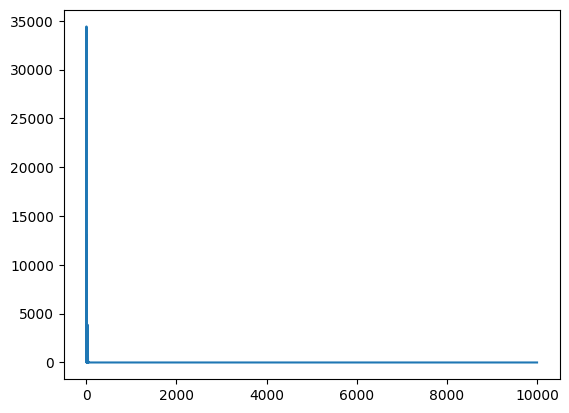

In [60]:
from matplotlib import pyplot as plt
plt.plot(losses)

2.4.2 Решите задачу 2.4.1, используя пакетный градиентный спуск

Вычисления для этой задачи:
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

2.4.1.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами


In [ ]:
class MSELoss:
  def forward(self, y_pred, y_true):
    return # <реализовать логику MSE>

  def backward(self, y_pred, y_true):
    self.dinput = # df/dy^


2.4.2.2. Модифицируйте класс `Neuron` из __2.4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными.

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [ ]:
class Neuron:
  def __init__(self, n_inputs):
    # <создать атрибуты объекта weights и bias>
    pass

  def forward(self, inputs):
    return # <реализовать логику нейрона>

  def backward(self, dvalue):
    # dvalue - значение градиента, которое приходит нейрону от следующего слоя сети
    # в данном случае это будет градиент L по y^ (созданный методом backwards у объекта MSELoss)
    self.dweights = # df/dW
    self.dbias = # df/db


2.4.2.3 Допишите цикл для настройки весов нейрона

In [ ]:
n_inputs = # <размерность элемента выборки >
learning_rate = 0.1 #  скорость обучения
n_epoch = 100 #  количество эпох

neuron = Neuron(n_inputs)
loss = MSELoss()


for epoch in range(100):
    # forward pass
    y_pred = # <прогон через нейрон>
    curr_loss = # <прогон через функцию потерь>
    losses.append(curr_loss)

    # backprop
    # <вызов методов backward>
    # обратите внимание на последовательность вызовов: от конца к началу

    # <шаг оптимизации для весов (weights и bias) нейрона>

2.4.3  Используя один полносвязный слой и  пакетный градиетный спуск, решите задачу регрессии из __2.4.1__

2.4.3.1 Модифицируйте класс `Linear` из __2.1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

In [ ]:
class Linear:
  def __init__(self, n_features, n_neurons):
    # <создать атрибуты объекта weights и biases>
    pass

  def forward(self, inputs):
    return # <реализовать логику слоя>

  def backward(self, dvalues):
    self.dweights = # df/dW
    self.dbiases = # df/db
    self.dinputs = # df/dX

2.4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

2.4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [ ]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size())

In [ ]:
class Activation_ReLU:
  def forward(self, inputs):
    self.inputs = inputs
    self.output = inputs.clip(min=0)
    return self.output

  def backward(self, dvalues):
    self.dinputs = dvalues.clone()
    self.dinputs[self.inputs <= 0] = 0

In [ ]:
# создание компонентов сети
# fc1 =
# relu1 =
# fc2 =

loss = MSELoss()
lr = 0.02

ys = []
for epoch in range(2001):
  # <forward pass>
  # fc1 > relu1 > fc2 > loss

  data_loss = # <прогон через функцию потерь>

  if epoch % 200 == 0:
    print(f'epoch {epoch} mean loss {data_loss}')
    ys.append(out)

  # <backprop>
  # loss > fc2 > relu1 > fc1

  # <шаг оптимизации для fc1>

  # <шаг оптимизации для fc2>


In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(ys), 1, figsize=(10, 40))
for ax, y_ in zip(axs, ys):
  ax.scatter(X.numpy(), y.numpy(), color = "orange")
  ax.plot(X.numpy(), y_.numpy(), 'g-', lw=3)
  ax.set_xlim(-1.05, 1.5)
  ax.set_ylim(-0.25, 1.25)